## Import packages

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [222]:
data = pd.read_csv('monster_data.csv')

In [223]:
print('data dimensions: ',np.shape(data))

data dimensions:  (723, 23)


In [224]:
data.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Regigigas,Normal,NaN,670,110,160,110,80,110,...,White,False,NaN,Undiscovered,NaN,False,3.71,420.0,3,bipedal_tailless
1,2,Tyrantrum,Rock,Dragon,521,82,121,119,69,59,...,Red,True,0.875,Monster,Dragon,False,2.49,270.0,45,bipedal_tailed
2,3,Braviary,Normal,Flying,510,100,123,75,57,75,...,Red,True,1.000,Flying,NaN,False,1.50,41.0,60,two_wings
3,4,Tepig,Fire,NaN,308,65,63,45,45,45,...,Red,True,0.875,Field,NaN,False,0.51,9.9,45,quadruped
4,5,Luxray,Electric,NaN,523,80,120,79,95,79,...,Blue,True,0.500,Field,NaN,False,1.40,42.0,45,quadruped


In [225]:
data.isna().sum().sort_values(ascending = False)

Egg_Group_2         531
Type_2              372
Pr_Male              77
Body_Style            0
Sp_Def                0
Name                  0
Type_1                0
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Generation            0
Speed                 0
Catch_Rate            0
isLegendary           0
Color                 0
hasGender             0
Egg_Group_1           0
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Number                0
dtype: int64

In [226]:
data['Egg_Group_2'].value_counts()

Dragon        35
Grass         32
Field         31
Fairy         18
Water_3       15
Human-Like    15
Water_1       13
Mineral        8
Water_2        8
Amorphous      8
Flying         6
Bug            2
Monster        1
Name: Egg_Group_2, dtype: int64

In [227]:
data['Type_2'].value_counts()

Flying      87
Poison      31
Ground      30
Psychic     28
Steel       19
Fighting    19
Grass       18
Fairy       18
Dark        16
Rock        14
Dragon      14
Water       13
Ghost       12
Ice         10
Fire         9
Electric     6
Normal       4
Bug          3
Name: Type_2, dtype: int64

In [228]:
data['Pr_Male'].value_counts()

0.500    458
0.875    102
0.000     24
0.250     22
0.750     19
1.000     19
0.125      2
Name: Pr_Male, dtype: int64

In [229]:
data['Egg_Group_2'].fillna('None', inplace = True)
data['Type_2'].fillna('None', inplace = True)
data['Pr_Male'].fillna(0, inplace = True)

In [230]:
data.isna().sum().sort_values(ascending = False)

Body_Style          0
Speed               0
Name                0
Type_1              0
Type_2              0
Total               0
HP                  0
Attack              0
Defense             0
Sp_Atk              0
Sp_Def              0
Generation          0
Catch_Rate          0
isLegendary         0
Color               0
hasGender           0
Pr_Male             0
Egg_Group_1         0
Egg_Group_2         0
hasMegaEvolution    0
Height_m            0
Weight_kg           0
Number              0
dtype: int64

In [231]:
data.drop(['Number','Name'], axis = 1, inplace= True)

In [232]:
t_f_columns = ['isLegendary','hasGender','hasMegaEvolution']
data[t_f_columns] = data[t_f_columns].astype(int)

In [233]:
data

,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Normal,None,670,110,160,110,80,110,100,4,...,White,0,0.000,Undiscovered,None,0,3.71,420.0,3,bipedal_tailless
1,Rock,Dragon,521,82,121,119,69,59,71,6,...,Red,1,0.875,Monster,Dragon,0,2.49,270.0,45,bipedal_tailed
2,Normal,Flying,510,100,123,75,57,75,80,5,...,Red,1,1.000,Flying,None,0,1.50,41.0,60,two_wings
3,Fire,None,308,65,63,45,45,45,45,5,...,Red,1,0.875,Field,None,0,0.51,9.9,45,quadruped
4,Electric,None,523,80,120,79,95,79,70,4,...,Blue,1,0.500,Field,None,0,1.40,42.0,45,quadruped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,Poison,Flying,455,75,80,70,65,75,90,1,...,Purple,1,0.500,Flying,None,0,1.60,55.0,90,two_wings
719,Bug,Poison,390,70,90,70,60,60,40,2,...,Red,1,0.500,Bug,None,0,1.09,33.5,90,insectoid
720,Rock,None,495,97,165,60,65,50,58,4,...,Blue,1,0.875,Monster,None,0,1.60,102.5,45,bipedal_tailed
721,Flying,Dragon,245,40,30,35,45,40,55,6,...,Purple,1,0.500,Flying,None,0,0.51,8.0,190,two_wings


In [234]:
num_columns = ['Total','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Height_m','Weight_kg','Catch_Rate']
cat_columns = ['Type_1','Type_2','Color','Pr_Male','Egg_Group_1','Egg_Group_2','Body_Style']

data[cat_columns] = data[cat_columns].astype('category')

In [235]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,723.0,417.905947,109.629593,180.0,320.00,424.00,499.00,720.0
HP,723.0,68.573997,26.441981,1.0,50.00,65.00,80.00,255.0
Attack,723.0,74.907331,29.031333,5.0,53.00,73.00,95.00,165.0
Defense,723.0,70.994467,29.872072,5.0,50.00,65.00,85.00,231.0
Sp_Atk,723.0,68.804979,28.819659,10.0,45.00,65.00,90.00,154.0
Sp_Def,723.0,69.172891,27.089505,8.0,50.00,65.00,85.00,230.0
Speed,723.0,65.733057,27.280869,5.0,45.00,65.00,85.00,160.0
Generation,723.0,3.325035,1.668768,1.0,2.00,3.00,5.00,6.0
isLegendary,723.0,0.065007,0.246709,0.0,0.00,0.00,0.00,1.0
hasGender,723.0,0.892116,0.310448,0.0,1.00,1.00,1.00,1.0


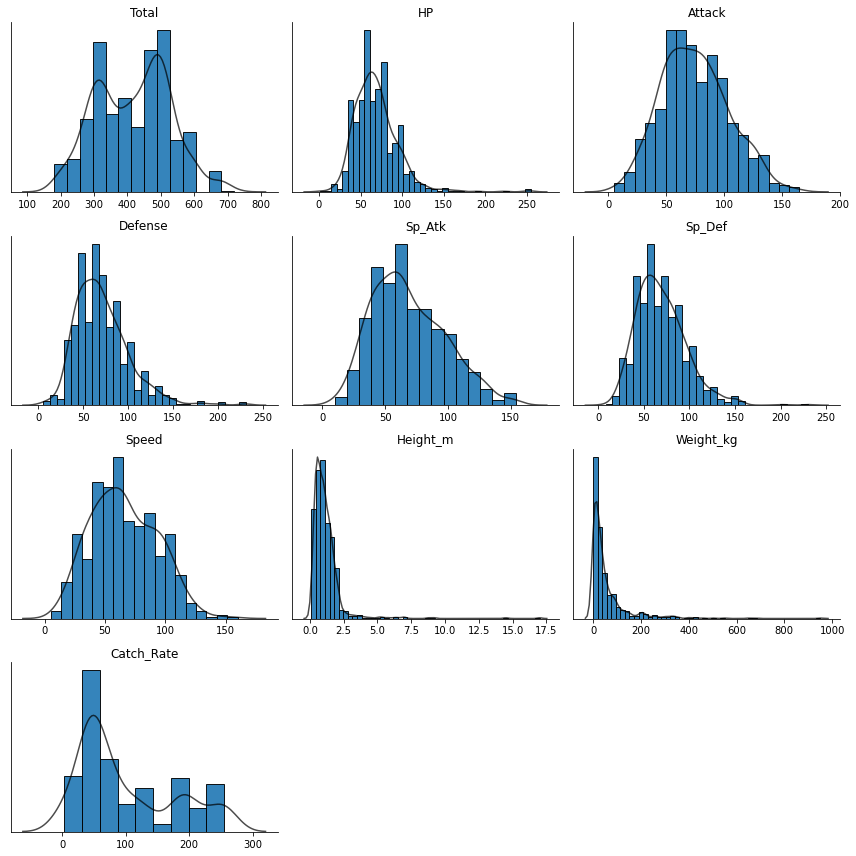

In [249]:
from statlearning import plot_dists
plot_dists(data[['Total','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Height_m','Weight_kg','Catch_Rate']])
plt.show()

(0.633308296839383, 2.5818412410810748e-82)


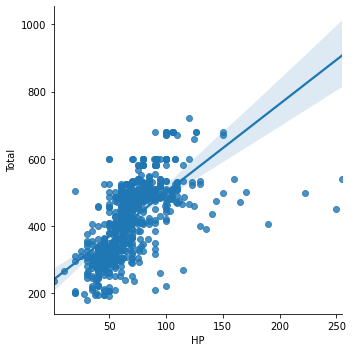

In [246]:
sns.lmplot(x='HP', y='Total', data=data)
import scipy.stats as stats
print(stats.pearsonr(data['HP'], data['Total']))

(0.7002430777833584, 1.2632115317476834e-107)


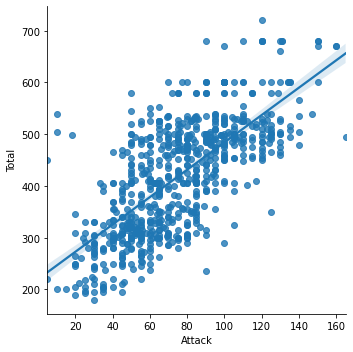

In [247]:
sns.lmplot(x='Attack', y='Total', data=data)
import scipy.stats as stats
print(stats.pearsonr(data['Attack'], data['Total']))

(0.5993913717593564, 1.0009243482538404e-71)


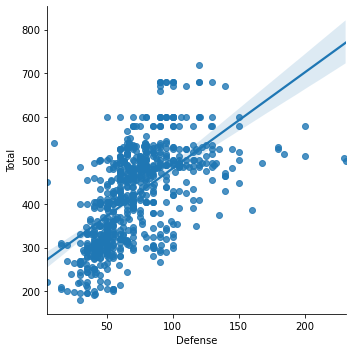

In [248]:
sns.lmplot(x='Defense', y='Total', data=data)
import scipy.stats as stats
print(stats.pearsonr(data['Defense'], data['Total']))

(0.5498225911048946, 2.3588643878284954e-58)


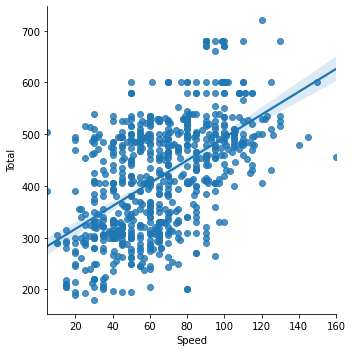

In [250]:
sns.lmplot(x='Speed', y='Total', data=data)
import scipy.stats as stats
print(stats.pearsonr(data['Speed'], data['Total']))

(0.47229359425974615, 1.9097625924216916e-41)


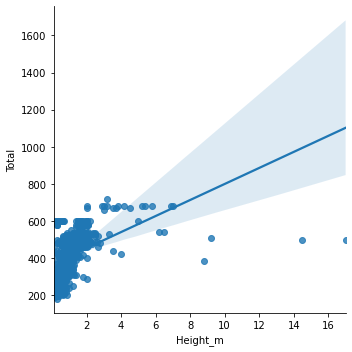

In [251]:
sns.lmplot(x='Height_m', y='Total', data=data)
import scipy.stats as stats
print(stats.pearsonr(data['Height_m'], data['Total']))

(0.5356922107226625, 6.146614334447421e-55)


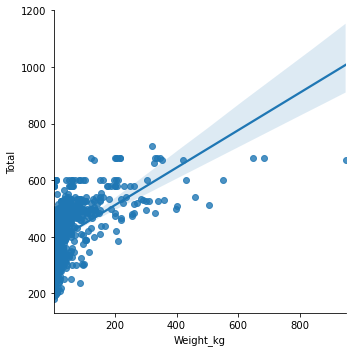

In [252]:
sns.lmplot(x='Weight_kg', y='Total', data=data)
import scipy.stats as stats
print(stats.pearsonr(data['Weight_kg'], data['Total']))

(-0.7367041372692509, 1.2481408877544701e-124)


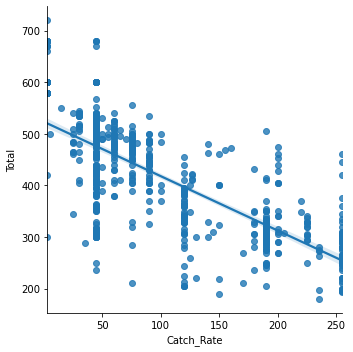

In [253]:
sns.lmplot(x='Catch_Rate', y='Total', data=data)
import scipy.stats as stats
print(stats.pearsonr(data['Catch_Rate'], data['Total']))

## Numerical Varibles Distribution
### Start by taking a look at the distributions of the numerical variables HP, Attack, Defense and so on.

### - The variable 'HP', 'Height_m', 'Weight_krg' have a heavy right skew, generated because of the lower limit at zero of the variables. If I am using K-Means clustering, there will be no need to normalize the feature, but we may have to do so for other models.

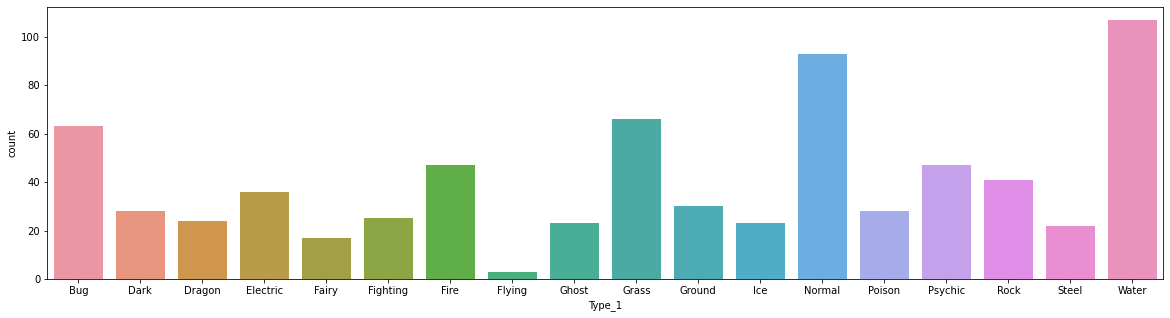

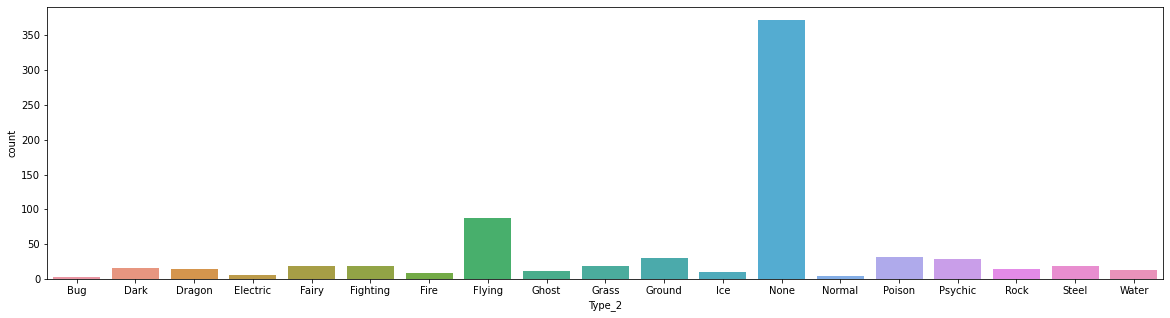

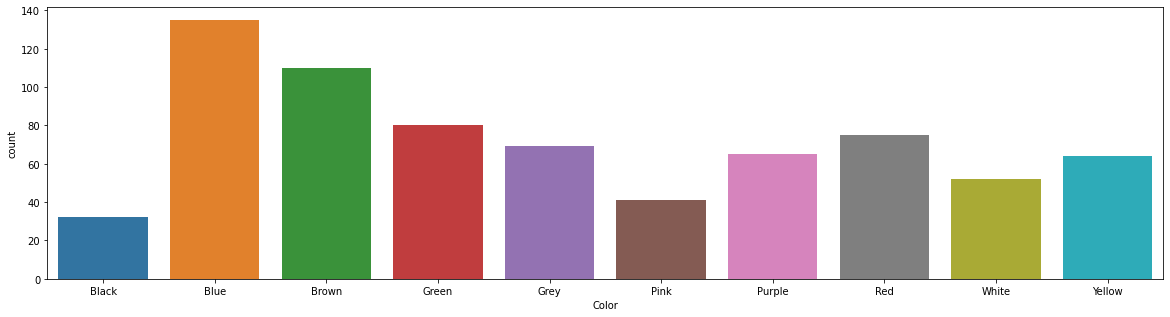

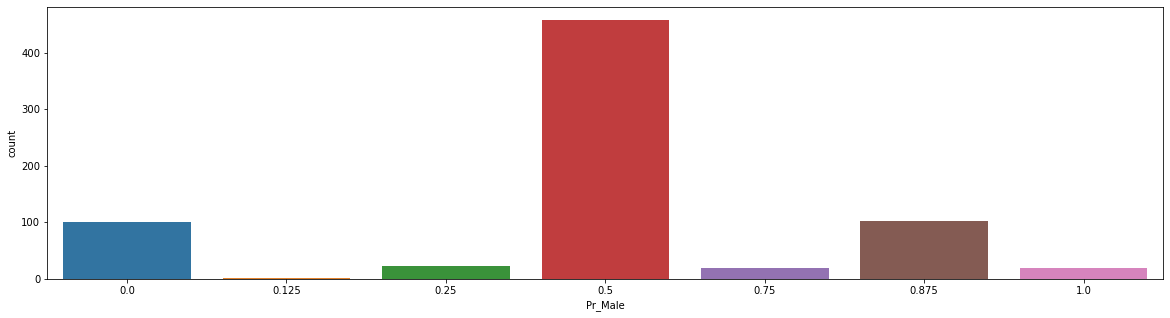

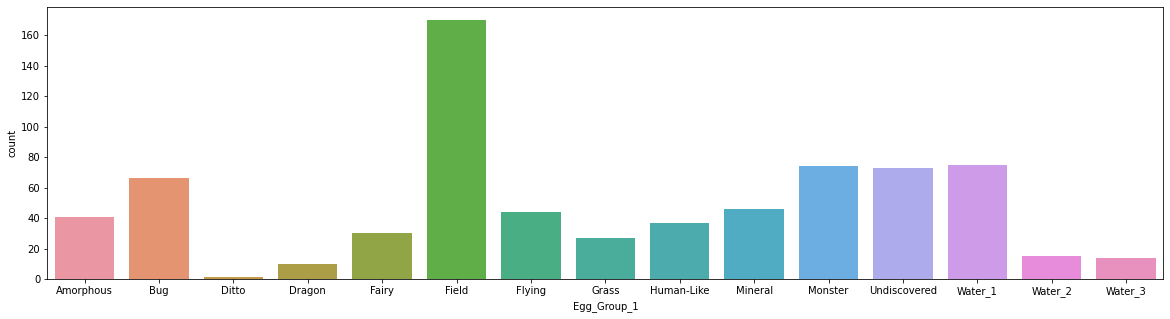

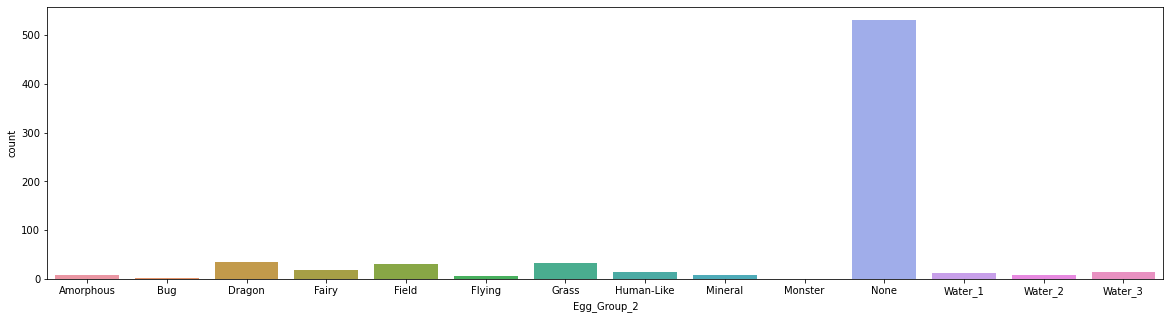

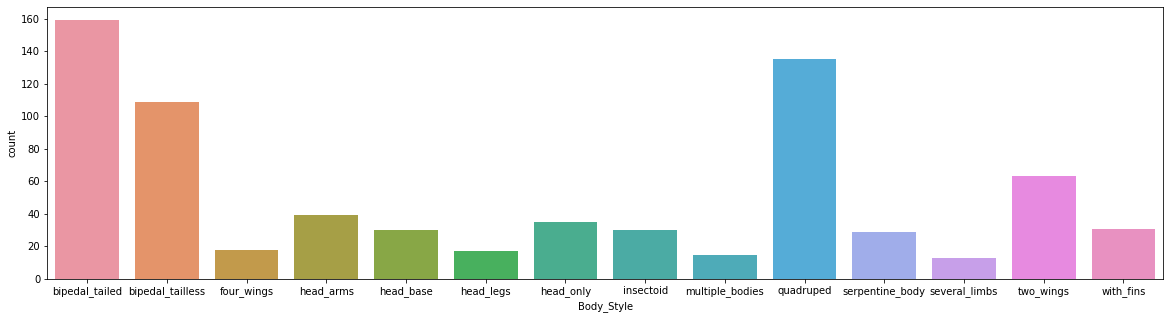

In [237]:
for category in cat_columns:
    plt.figure(figsize=(20,5))
    sns.countplot(data = data, x = category)

## Categorical Variables Distribution
### Take a look at categorical variables. Running univariant countplots, I reach the following conclusions:

### - I could drop Type_2 and Egg_Group_2 due to sparse values domination.
### - Most monsters have 0.5 for Pr_Male level, indeed quite interesting... There are only 1,8% graduate students. We could 

In [260]:
cat_aux = ['Type_1','Color','Pr_Male','Egg_Group_1','Body_Style']

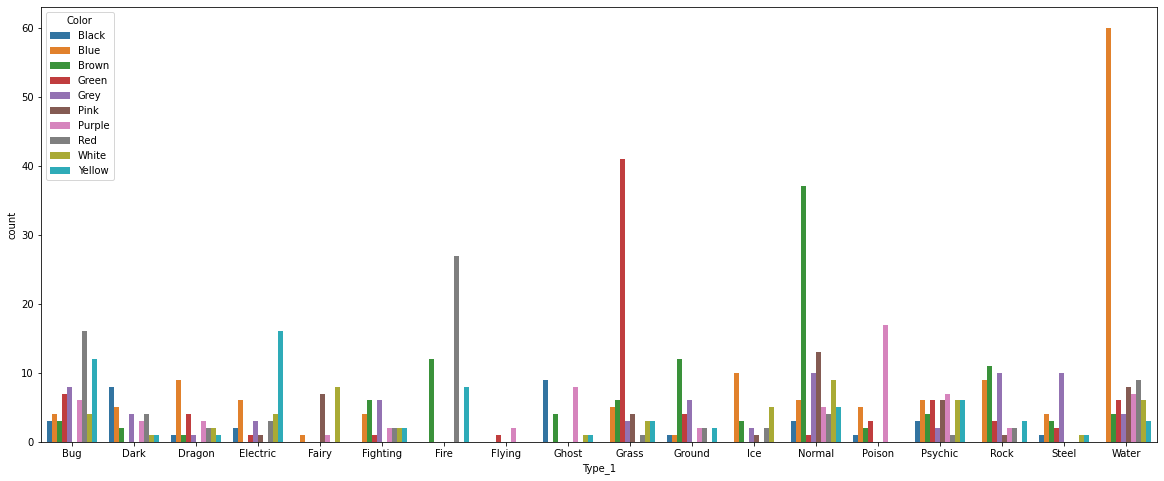

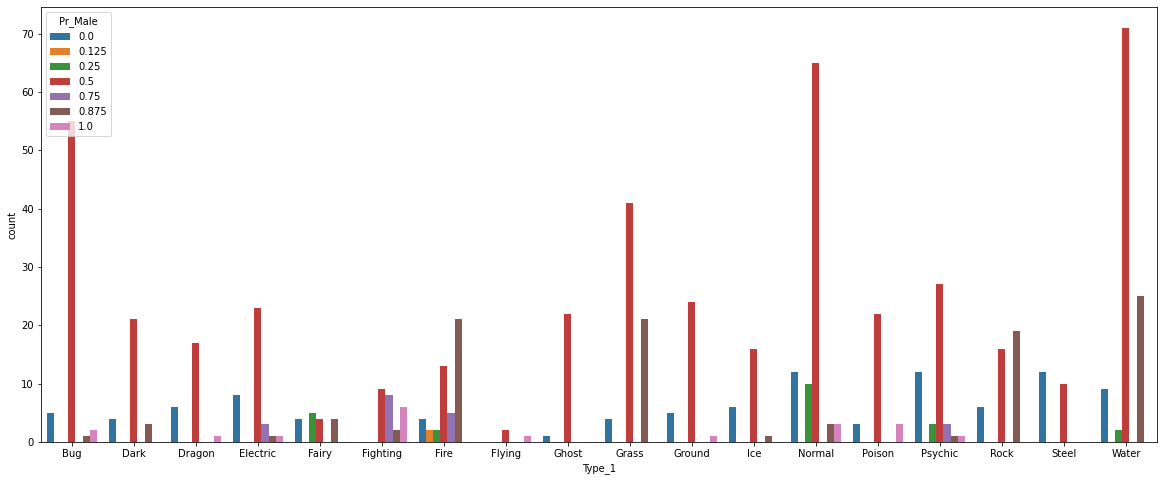

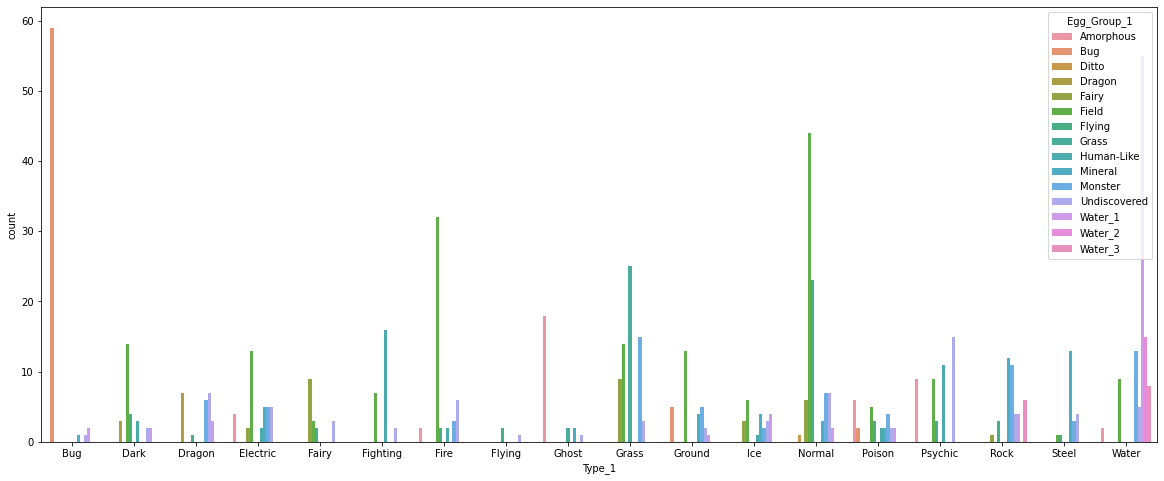

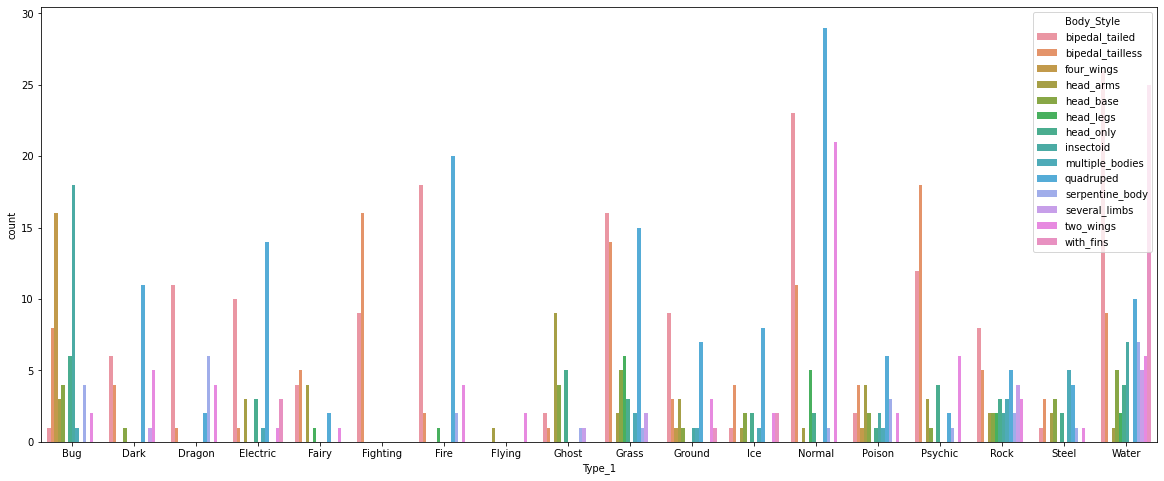

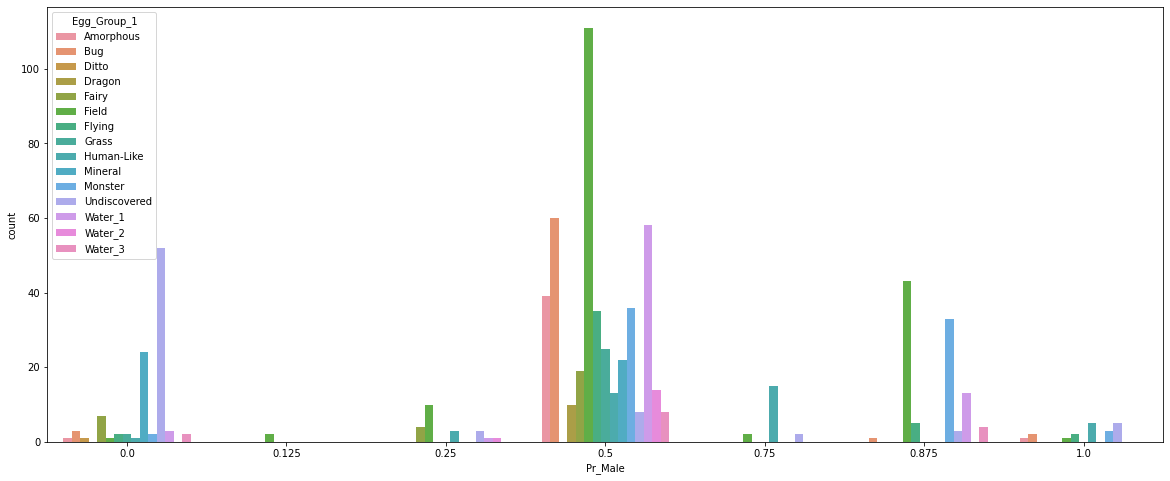

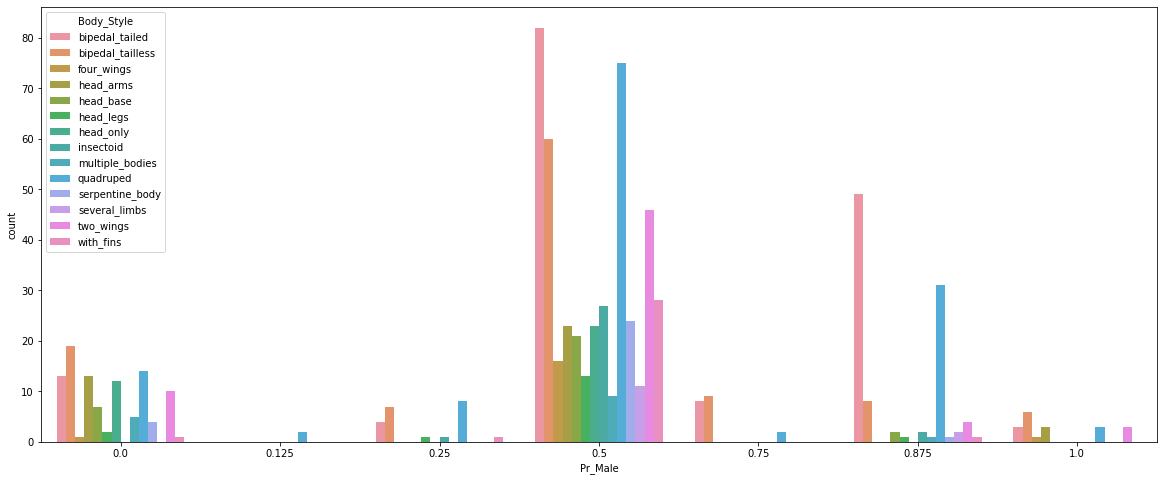

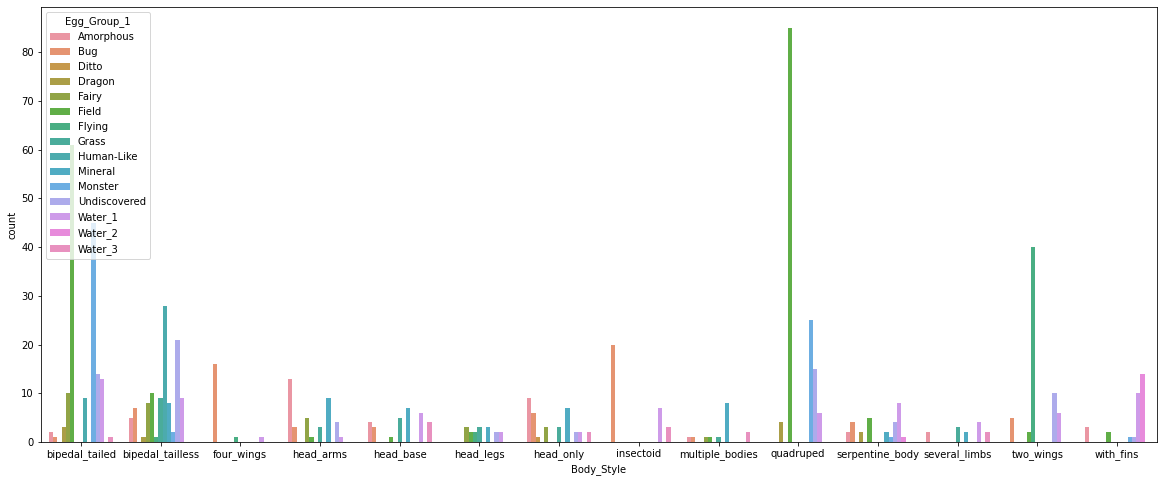

In [261]:
for category1 in cat_aux:
    cat_aux.pop(0);
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(20,8))
            sns.countplot(data=data, x=category1, hue=category2)

### There are a few interesting relationships that can be drawn from the data:

1) Monsters with Type_1 = 'Water' tend to have Blue color
2) Still majority of monsters have ambigious gender

In [238]:
df = pd.get_dummies(data, drop_first=True)

In [239]:
df

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,...,Body_Style_head_base,Body_Style_head_legs,Body_Style_head_only,Body_Style_insectoid,Body_Style_multiple_bodies,Body_Style_quadruped,Body_Style_serpentine_body,Body_Style_several_limbs,Body_Style_two_wings,Body_Style_with_fins
0,670,110,160,110,80,110,100,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,521,82,121,119,69,59,71,6,0,1,...,0,0,0,0,0,0,0,0,0,0
2,510,100,123,75,57,75,80,5,0,1,...,0,0,0,0,0,0,0,0,1,0
3,308,65,63,45,45,45,45,5,0,1,...,0,0,0,0,0,1,0,0,0,0
4,523,80,120,79,95,79,70,4,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,455,75,80,70,65,75,90,1,0,1,...,0,0,0,0,0,0,0,0,1,0
719,390,70,90,70,60,60,40,2,0,1,...,0,0,0,1,0,0,0,0,0,0
720,495,97,165,60,65,50,58,4,0,1,...,0,0,0,0,0,0,0,0,0,0
721,245,40,30,35,45,40,55,6,0,1,...,0,0,0,0,0,0,0,0,1,0


In [240]:
# Rescale the x and y values between 0 and 1
min_df = df.min(axis = 0)
max_df = df.max(axis = 0)
df = (df - min_df)/(max_df - min_df)

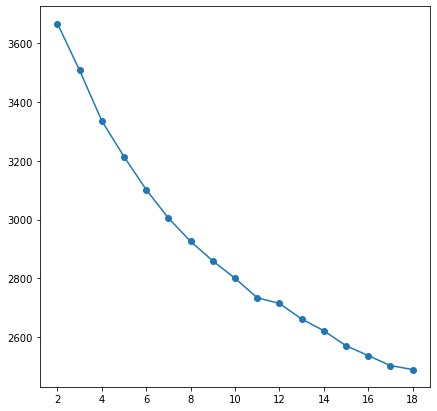

In [241]:
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0).fit(df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

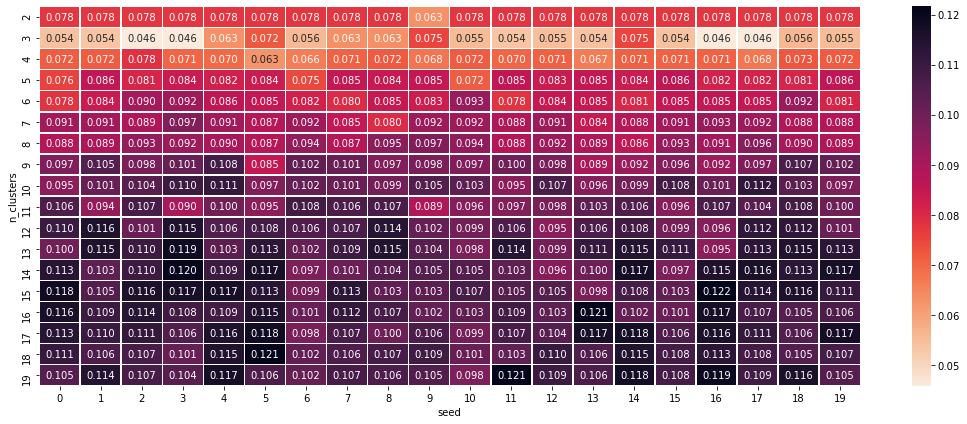

In [242]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range=range(2, 20)
random_range  =range(0, 20)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer=KMeans(n_clusters=c, random_state=r)
        cluster_labels=clusterer.fit_predict(df)
        silhouette_avg=silhouette_score(df, cluster_labels)
        results.append([c,r,silhouette_avg])

result  =pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km=pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

In [112]:
from sklearn.decomposition import PCA

In [114]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(df)

In [115]:
X_pca_df = pd.DataFrame(data= X_pca, columns=['X1', 'X2', 'X3'])

In [117]:
kmeans=KMeans(n_clusters=5, random_state=0).fit(df)

In [53]:
# Initialise centroids
k = 3
np.random.seed(1)
centroids = np.random.rand(k, 2)

In [54]:
# Calculate distance to closest centroid
n_points = df.shape[0]
labels = np.zeros(n_points)

In [55]:
converged = False
while converged == False:

    new_labels = np.zeros(n_points)
    for p in range(n_points):
        dists = np.zeros(k)
        # Calculate closest centroid
        for i in range(k):
            dists[i] = np.linalg.norm(df[p,:] - centroids[i,:])

        newlabels[p] = np.argmin(dists)

    if np.array_equal(labels, new_labels):
        converged = True

    labels = new_labels

ValueError: operands could not be broadcast together with shapes (7,) (2,) 

In [106]:
# Rescale the x and y values between 0 and 1
min_df = df.min(axis = 0)
max_df = df.max(axis = 0)
df = (df - min_df)/(max_df - min_df)

In [107]:
# Perform kmeans clustering
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [108]:
plt.scatter(df[:,0], df[:,1],df[:,2],df[:,3],df[:,4],df[:,5],df[:,6], s = 20, label = 'Data', cmap = 'rainbow', c = labels)
plt.scatter(centroids[:, 0], centroids[:, 1], s = 100, color = 'gold', edgecolors = 'black', label = 'Centroids')

plt.xlabel('Salary'); plt.ylabel('Amount Spent'); plt.legend(); plt.axis('scaled'); plt.savefig('plot')

TypeError: scatter() got multiple values for argument 's'